NLTK Corpus

In [1]:
import nltk 
nltk.download(['inaugural','brown'])

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\irisc\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\irisc\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

In [4]:
#genre 별로 modal의 빈도수를 가진 cfd1
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)

genres = brown.categories()[::5]
modals = ['can','could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions = genres, samples = modals)

            can could  will would   may might 
adventure    46   151    50   191     5    58 
  hobbies   268    58   264    78   131    22 
     news    93    86   389   244    66    38 


In [5]:
#genre 별로 modal의 빈도수를 가진 cfd2
cfd2 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    for word in brown.words(categories = genre)
        if word.lower() == modals)
cfd2.tabulate()

                  Can Could   May Might  Will Would   can could   may might  will would 
      adventure     2     3     2     1     1     3    46   151     5    58    50   191 
 belles_lettres     3     3    14     0    10     5   246   213   207   113   236   392 
      editorial     3     1     5     0     2     5   121    56    74    39   233   180 
        fiction     2     2     2     0     4     4    37   166     8    44    52   287 
     government     2     0    26     0     0     0   117    38   153    13   244   120 
        hobbies     8     1    12     0     5     5   268    58   131    22   264    78 
          humor     1     3     0     0     0     0    16    30     8     8    13    56 
        learned     2     0    12     0     0     2   365   159   324   128   340   319 
           lore     0     1     5     1     3     2   170   141   165    49   175   186 
        mystery     3     4     2     0     5     3    42   141    13    57    20   186 
           news     1

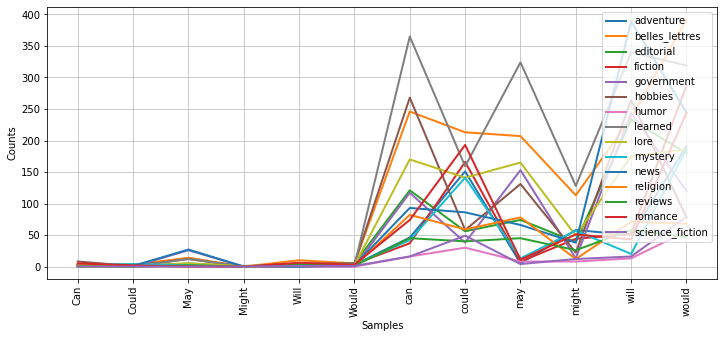

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
import matplotlib.pyplot as plt #plt라는 이름으로 가져오겠다.
plt.figure(figsize = (12,5))
cfd2.plot()

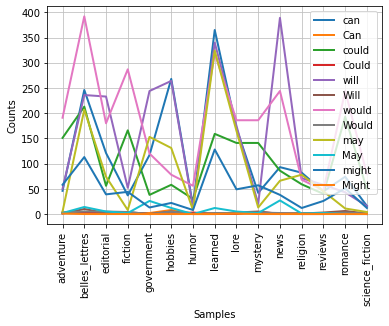

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
cfd3 = nltk.ConditionalFreqDist(
    (word, genre)
    for genre in brown.categories()
    for modals in ['can','could', 'will','would','may','might']
    for word in brown.words (categories = genre)
        if word.lower() == modals
)
cfd3.plot()

Inaugural(연설문 데이터)

In [10]:
inaugural = nltk.corpus.inaugural
inaugural.fileids() #연도 - 이름.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

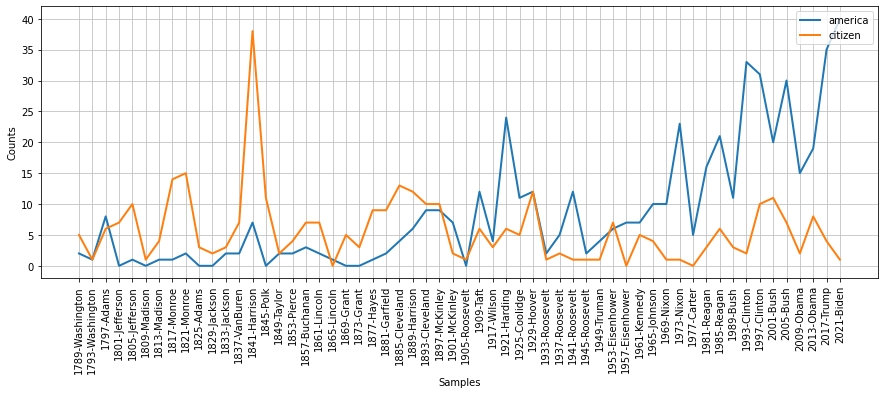

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
#inaugural에서 america, citizen의 빈도수, 연도별로

cfd4 = nltk.ConditionalFreqDist(
    (targeted_word, fileid[:-4])
    for fileid in inaugural.fileids()
    for targeted_word in ['america', 'citizen']
    for word in inaugural.words(fileids = fileid)
        if word.lower().startswith(targeted_word))
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
cfd4.plot()

In [16]:
cfd5 = nltk.ConditionalFreqDist(
    (fileid[:-4], target_word)
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    for word in inaugural.words(fileids = fileid)
        if word.lower().startswith(target_word))

cfd5.tabulate()

                america citizen 
1789-Washington       2       5 
1793-Washington       1       1 
     1797-Adams       8       6 
 1801-Jefferson       0       7 
 1805-Jefferson       1      10 
   1809-Madison       0       1 
   1813-Madison       1       4 
    1817-Monroe       1      14 
    1821-Monroe       2      15 
     1825-Adams       0       3 
   1829-Jackson       0       2 
   1833-Jackson       2       3 
  1837-VanBuren       2       7 
  1841-Harrison       7      38 
      1845-Polk       0      11 
    1849-Taylor       2       2 
    1853-Pierce       2       4 
  1857-Buchanan       3       7 
   1861-Lincoln       2       7 
   1865-Lincoln       1       0 
     1869-Grant       0       5 
     1873-Grant       0       3 
     1877-Hayes       1       9 
  1881-Garfield       2       9 
 1885-Cleveland       4      13 
  1889-Harrison       6      12 
 1893-Cleveland       9      10 
  1897-McKinley       9      10 
  1901-McKinley       7       2 
 1905-Roos

## Tuple & List

1. 생성

In [17]:
#빈 튜플 
empty_Tuple1 = ()
empty_Tuple2 = tuple()

#빈 리스트
empty_List1 = []
empty_List2 = list()

empty_Tuple1, empty_Tuple2, empty_List1, empty_List2 

((), (), [], [])

1.2 요소가 2개 이상일 때

In [19]:
listA = ['a', 'b']

tupleA = 'a', 'b'#괄호없이 사용할 수 있음
tupleB = ('a','b')

listA, tupleA, tupleB

(['a', 'b'], ('a', 'b'), ('a', 'b'))

1.3요소가 1개일 때

In [20]:
listA = ['a']

tupleA = ('a',)#comma 필수
tupleB = 'a', #괄호 빼고 사용, 마찬가지로 comma써주기

listA, tupleA, tupleB

(['a'], ('a',), ('a',))

1.3.1 만약 comma가 없다면

In [24]:
no_comma = ('a') #스트링이 됨
print(type(no_comma),type(tupleA))

<class 'str'> <class 'tuple'>


2. 여러 변수 할당하기
- packing : 한 변수에 여러 개의 데이터를 할당하는 것
    - 리스트, 튜플 자체가 a = [1,2,3,4]
- unpacking : 한 변수에 여러 데이터가 들어있을 때, 그것을 여러 변수에 나누는 것
    - kim = [1,2,3] -> k = 1, i = 2, m = 3

In [27]:
name = 'lee'
a,b,c = name
#unpacking
print(a,b,c)
print(a)

l e e
l


In [28]:
#변수의 수는 일대일 대응으로 이루어져야 한다.
name = Potter
a, b, c = name
a, b, c

NameError: name 'Potter' is not defined

3.값 교환

In [29]:
pwd = 'abcd'
userid = 'hello'

#pwd = 'hello', userid = 'abcd'로 교환하기 
temp1 = pwd
temp2 = userid
pwd = temp2 
userid = temp1
print(pwd,userid)

hello abcd


In [30]:
#튜플을 사용하여 교환하기 
pwd, userid = userid, pwd
print(pwd, userid)

abcd hello


4.연산
- 리스트와 동일

In [32]:
#덧셈
('a',) + ('b', 'c')

('a', 'b', 'c')

In [33]:
#곱셈
('a', 'b')*3

('a', 'b', 'a', 'b', 'a', 'b')

In [34]:
a = 1,2 
b = 1,3 
a > b, a, b

(False, (1, 2), (1, 3))

5. 순회하기 

In [35]:
a = 1, 2, 3, 4, 5
for i in a:
    print(a)

(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)


6. list comprehension
 - tuple? (x)

In [37]:
#쓰고 싶다면 
#1. 튜플로 감싸기
tuple([word for word in a])

#효율성이 매우 낮음 
*[word for word in a],

(1, 2, 3, 4, 5)

## 튜플은 불변 객체이다. 
- 즉, 추가로 첨가할 수 없다.
- 코드를 수정할 때 튜플을 수정할 수 없게 만드는 용도로 사용한다. 
    - ex) key 값 저장 
- 메모리의 사용이 적다.

In [38]:
a = (1,)
b = (1, 2, 3)

#더하면 다른 객체가 만들어진다. 튜플은 수정이 불가능하다

id(a), id(a+b)

(2268551928032, 2268575499824)

7. 형 변환
- tuple()
- ()

In [41]:
tuple('cat'), ('cat')

(('c', 'a', 't'), 'cat')

In [42]:
list('cat')

['c', 'a', 't']

In [43]:
#슬라이싱(튜플도 인덱스를 사용할 수 있다.)
tupleA = ['t', 'u', 'p', 'l', 'e']
tupleA[0]

't'

## 장점
- 튜플의 장점:
    - 타인이 변경하는 것을 막을 수 있다. 
    - 메모리의 사용이 적다.
- 리스트의 장점:
    - 데이터를 순차적으로 파악하기 좋다. 
    - 중복되는 데이터를 포함할 수 있다.

## List 관련 함수

1. 변경, 삭제, 추가
2. list comprehension 업그레이드

In [44]:
days = ['월', '화', '수', '목']

#fri 추가하기, 추가시 반환은 안됨
days.append('금') #마지막에 요소 1개 추가, 여러 개는 안됨

In [45]:
days

['월', '화', '수', '목', '금']

In [46]:
#insert(index, item)
days.insert(2, 'sat')

In [47]:
days

['월', '화', 'sat', '수', '목', '금']

1.2 병합하기 

1.2.1 요소를 추가 

In [50]:
listA = ['수', '금', '지']
listB = ['화', '목', '토', '천', '해']

listA.extend(listB)
print(listA)

['수', '금', '지', '화', '목', '토', '천', '해']


1.2.2 리스트 자체 추가 

In [51]:
listA.append(listB)
print(listA)

['수', '금', '지', '화', '목', '토', '천', '해', ['화', '목', '토', '천', '해']]


1.2.3 리스트 안의 요소 추가(extend와 동일하게 사용됨)

In [52]:
listA += listB
listA

['수',
 '금',
 '지',
 '화',
 '목',
 '토',
 '천',
 '해',
 ['화', '목', '토', '천', '해'],
 '화',
 '목',
 '토',
 '천',
 '해']

1.2.4 offset/slicing

In [1]:
#offset
days = ['월', '화', '수', '금']
days[3] = '목'
print(days)

['월', '화', '수', '목']


In [7]:
#slicing
days[:3] = '금','토'
print(days)

['금', '토']


In [8]:
days[:3] = 'cat'
print(days) #str형 -> 하나씩 쪼개져서 들어감에 유의

['c', 'a', 't']


2. 삭제

2.1 del을 이용한 삭제 

In [14]:
animals = ['cat', 'cat', 'cat', 'dog','dog', 'hamster', 'bird']
del animals[1]
animals

['cat', 'cat', 'dog', 'dog', 'hamster', 'bird']

2.2 특정한 값 삭제

In [15]:
animals.remove('cat')
animals #모두 사라지는 것이 아님

['cat', 'dog', 'dog', 'hamster', 'bird']

2.3 맨 마지막 요소 삭제

In [16]:
#pop(index) default = -1, 맨 마지막 요소를 삭제 
animals.pop()

'bird'

In [17]:
animals.pop(0)

'cat'

In [18]:
animals.pop(1)
animals

['dog', 'hamster']

2.4 전체 삭제

In [19]:
#리스트 내 요소를 전부 삭제하고 빈 리스트로 만들고 싶을 때 사용 
animals.clear()
animals

[]

3. 값 찾기

In [21]:
a = list(range(5)) #a = [0,1,2,3,4]
a.index(1)

1

3.1 값 확인

In [23]:
#3이 리스트 안에 있는지 확인하기 
3 in a 

True

4.정렬하기 
- sort():정렬한 뒤 반환하지 않고, 기존 값 정렬됨 
- sorted(): 정렬된 복사본을 반환, 기존 값은 유지
- 리스트.reverse()
- list(reversed(리스트))

In [24]:
a = list(range(5))
b = sorted(a, reverse = True)
a, b

([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

In [25]:
b.sort()
b

[0, 1, 2, 3, 4]

In [26]:
b.reverse()
b

[4, 3, 2, 1, 0]

In [32]:
c = list(reversed(b))
b

[4, 3, 2, 1, 0]

5. 할당하기
- =으로 할당할 때에는 하나가 변할 때 같이 변하게 됨. 메모리 주소를 참고하고 있다.
- shallow copy
    - a가 변해도 b가 변하지 않게 하는 복사
    - 리스트.copy
    - list(리스트)
    - list[:]
- deep copy
    - 하위에 중첩된 리스트 요소가 바뀌는 것을 방지

5.1 =을 통한 할당

In [33]:
a = [0,1,2,3,4]

In [34]:
b = a #a,b가 메모리 주소를 참조
b[0] = 7
a,b #a의 첫번째 요소도 7로 바뀜

([7, 1, 2, 3, 4], [7, 1, 2, 3, 4])

In [35]:
id(a), id(b) #주소값도 동일

(2227409882112, 2227409882112)

5.2 shallow copy

In [40]:
b = a.copy()
c = list(a)
d = a[:]

print(id(a), id(b), id(c), id(d))

2227409882112 2227409654528 2227409911104 2227409654592


5.3 deep copy

In [41]:
a.append([6,7,8])
a

[7, 1, 2, 3, 4, [6, 7, 8]]

In [42]:
e = a.copy()
e

[7, 1, 2, 3, 4, [6, 7, 8]]

In [43]:
a[-1][0] = 0
a , e

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 8]])

In [44]:
import copy
f = copy.deepcopy(a)
f

[7, 1, 2, 3, 4, [0, 7, 8]]

In [45]:
f[-1][-1] = 9
a, f #a 와 f가 달라짐

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 9]])

6. 순회하기
- zip() : 여러 개 리스트 동시 순회
- enumerate() : 인덱스도 함께 돌고자 할 때(list,range)
- range()

In [54]:
a = [1, 2, 3]
b = ['mon','tue','wed','thu']

for itemA, itemB in zip(a,b): #아이템 수가 적은 시퀀스에서 완료됨
    print((itemA, itemB))

(1, 'mon')
(2, 'tue')
(3, 'wed')


In [49]:
list(zip(a,b))

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [50]:
dict(zip(a,b)) #딕셔너리형으로 

{1: 'mon', 2: 'tue', 3: 'wed'}

In [53]:
for idx, itemA in enumerate(b): #enumnerate->인덱스+리스트
    print((idx, itemA))

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


6.1 List Comprehension에서의 활용 

In [57]:
ex = [(nal, day) for nal, day in zip(a,b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

## 연습
- 리스트 -> for 문으로
- for 문을 사용하여 리스트 

In [63]:
#for 문 <-> 리스트컴프리헨션 바꾸기
name = ['kate', 'Jessica', 'Tom']
age = [23,25,26]
[(i, j) for i, j in zip(name, age)]


[('kate', 23), ('Jessica', 25), ('Tom', 26)]

In [68]:
result = []
for i, j in zip(name, age):
    result.append((i, j))
print([result])

[[('kate', 23), ('Jessica', 25), ('Tom', 26)]]


In [69]:
[[(i, j) for j in age] for i in name]

[[('kate', 23), ('kate', 25), ('kate', 26)],
 [('Jessica', 23), ('Jessica', 25), ('Jessica', 26)],
 [('Tom', 23), ('Tom', 25), ('Tom', 26)]]

In [90]:
for i in name:
    empty = []
    for j in age:
        print(i,j)
        empty.append((i, j))

['kate', 23]
['kate', 25]
['kate', 26]
['Jessica', 23]
['Jessica', 25]
['Jessica', 26]
['Tom', 23]
['Tom', 25]
['Tom', 26]


## 연습

In [92]:
#(대문자, 첫글자대문자, 글자수) 리스트 만들기
sentence = "do not judge a book by its cover"

In [93]:
sent = sentence.split()
[(word.upper(), word.capitalize(), len(word)) for word in sent]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [99]:
#두문장으로 구성된 리스트 만들기
text = [['Sunja', 'said', 'goodnight', 'to',' her', 'mother'],
        ['Hansu','was', 'no', 'longer','in', 'Busan']]
[' '.join(sent) for sent in text]

['Sunja said goodnight to  her mother', 'Hansu was no longer in Busan']

In [101]:
#전체 단어를 하나의 리스트로 만들기 
[word for word in text for word in word]

['Sunja',
 'said',
 'goodnight',
 'to',
 ' her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

In [102]:
#전체를 스트링으로 가져오기
' '.join([word for word in text for word in word])

'Sunja said goodnight to  her mother Hansu was no longer in Busan'

## if 문 - else

In [103]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [104]:
#짝수면 가져오고, 홀수면 '홀수' 출력
[i if i%2 == 0 else '홀수' for i in range(10)] 

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

In [105]:
[num for num in range(10) if i%2 == 0 ...] #뒤에 쓰지 않는다.

SyntaxError: invalid syntax (Temp/ipykernel_15032/2867551434.py, line 1)